# Lab 1: Data preprocessing exploration

In this lab, we will cover:
- how to inspect and visualize a dataset with `pandas` and `seaborn`,
- how to train a scikit-learn model and measure its performance by splitting training and test data,
- how to preprocess numerical and categorical data to improve model performance.

Your task is to complete the code cells that contain the comment "# To complete here".
Start by filling in the box below.

In [2]:
# Fill in here:
# LAST NAME:
# FIRST NAME:
# Student ID:

## Documentation:

**During the lab, feel free to consult the [scikit-learn documentation](https://scikit-learn.org/stable/api/index.html), accessible at this link: [https://scikit-learn.org/stable/api/index.html](https://scikit-learn.org/stable/api/index.html)**. It contains many explanations on how to use the functions introduced in this lab.

## 0. Lab setup

The code below installs then imports the Python libraries needed for the lab.

In [3]:
!pip install numpy matplotlib pandas scikit-learn seaborn

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## 1. Data exploration and visualization

We start by loading the data from the "[palmer penguins](https://allisonhorst.github.io/palmerpenguins/)" dataset. The resulting object is a pandas [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), a type specialized for working with datasets.

The `.info()` function of a DataFrame displays information about the dataset.

In [5]:
data_penguins = sns.load_dataset("penguins")
data_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


The `.head()` function of a DataFrame displays the names of its columns as well as the contents of its first 5 rows.

In [6]:
data_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


To access a specific column of the dataframe, write `dataframe["column_name"]`.
Then, the `value_counts()` function returns information about the values in the column: the distinct values and their frequency.


In [7]:
species = data_penguins["species"]
species.value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

We can see here that the dataset contains 68 penguins of the "Chinstrap" species.

To obtain information about numerical data, you can use the `.describe()` function, as follows:

In [8]:
data_penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


**Q1**: write code to determine how many female penguins the dataset contains.

In [9]:
# Fill in here

The `.hist()` function displays a histogram to visualize the distribution of numerical data.

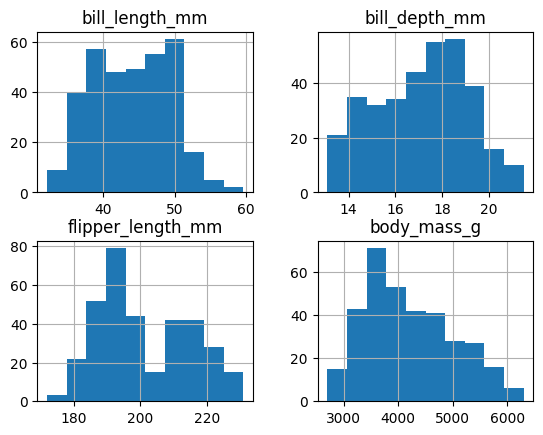

In [10]:
_ = data_penguins.hist()

The `seaborn.pairplot()` function displays plots showing the distribution of one column as a function of another. The `hue` parameter lets you choose a column by which to color the points. Here, we choose the column we will try to predict later: the species.

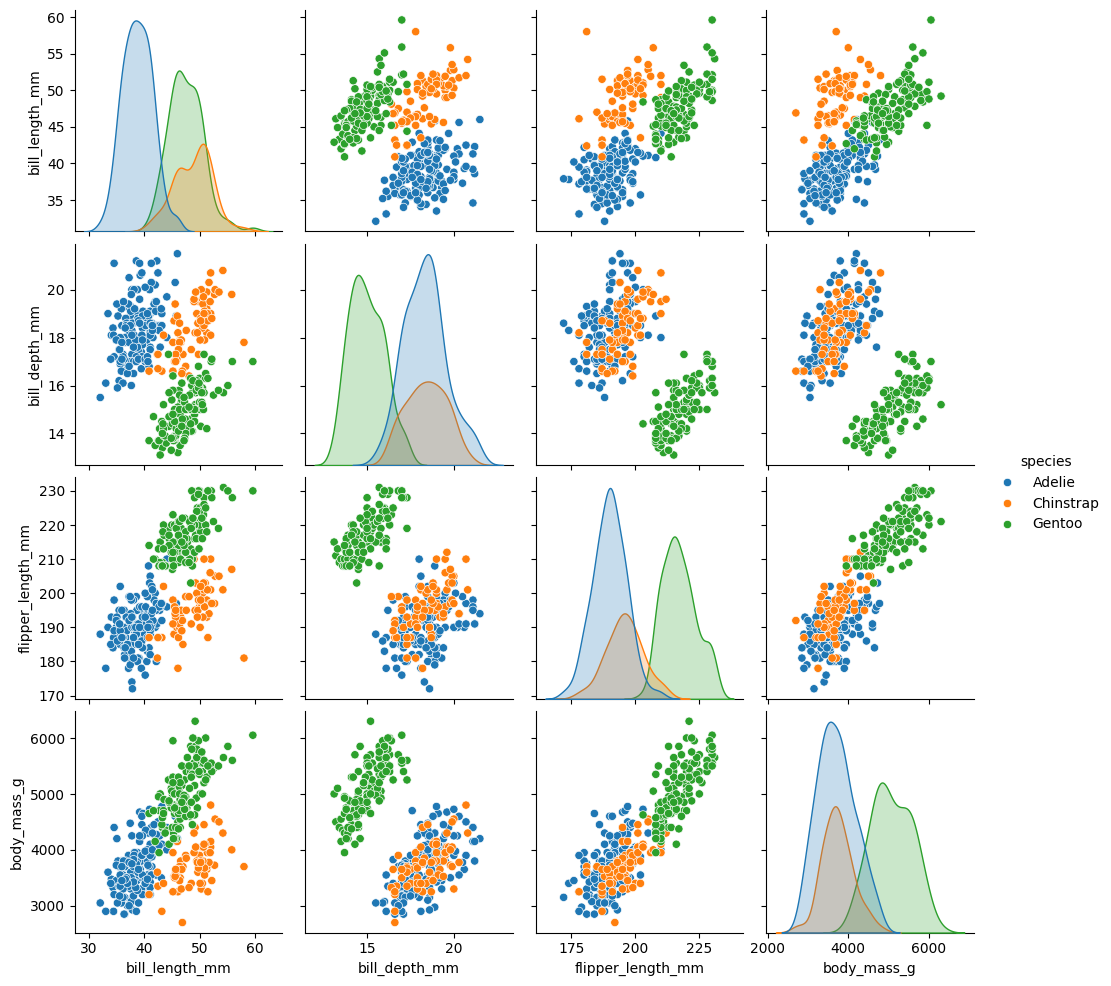

In [11]:
_ = sns.pairplot(data_penguins, hue="species")

### Exercise: your turn!

1. Load the "iris" dataset using `seaborn`'s `load_dataset()` function

In [12]:
# Fill in here

2. How many categorical columns? How many are numerical?

In [13]:
# Fill in here

3. Display a histogram for each numerical feature (column)

In [14]:
# Fill in here

4. Show the distribution of each pair of features as a function of the iris species (the `species` column).

In [15]:
# Fill in here

5. Based on these plots, do you think it is easy to determine the species of an iris from the `petal_width` and `petal_length` columns?

> Answer here

# 2. Train a model on numerical data

We will first restrict ourselves to the numerical data in the "palmer penguins" dataset, ignoring rows that contain missing values.

In [16]:
data_penguins_no_na = data_penguins.dropna()
numerical_columns = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
data = data_penguins_no_na[numerical_columns]
target = data_penguins_no_na["species"]

The first step is to split the data into two parts: one for training and one for validation.  
Here, `test_size` indicates the proportion of data to put in the validation set; in this case, 0.3 means 30%.

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state=0)

We train a simple linear model, logistic regression (which we will discuss in more detail in an upcoming course), on the training data.

In [18]:
from sklearn.linear_model import LogisticRegression
from time import time

model = LogisticRegression()
start = time()
_ = model.fit(X_train, y_train)
elapsed = time() - start

/Users/nath/Documents/MachineLearningCourse2026/.venv/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We now compute its accuracy on the test dataset. You should observe a score of around 97% in about 0.2 sec.

In [19]:
score = model.score(X_test, y_test)
print(f"Score sur les données de test: {score*100:.3f}%, entraîné en {elapsed:.3f}s.")

Score sur les données de test: 97.000%, entraîné en 0.006s.


### Exercise: your turn!

We will now verify (or correct) the intuition obtained at the end of the previous exercise.

1. Create a DataFrame called `data_iris` containing only the `petal_width` and `petal_length` columns from the `iris` dataset. Also create a variable named `target` that contains only the `species` column.

In [20]:
# Fill in here

2. Split these into a training dataset and a test dataset (containing 30% of the data).

In [21]:
# Fill in here

3. Train a `LogisticRegression` model on the training data, and measure its performance on the test set.

In [22]:
# Fill in here

4. Repeat the same experiment now using all numerical columns from the `iris` dataset. What do you observe?

In [23]:
# Fill in here

## Performance improvement: data scaling.

Linear models are sensitive to the scale of the input data, and work better when the data are centered and scaled.
This is not the case for our data, which is why the linear model emits a `ConvergenceWarning` when calling `fit()`.

To try to improve the model's performance, we will center and scale the data using a `StandardScaler` before passing them to the model. 

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
classifier = LogisticRegression()
scaled_model = make_pipeline(scaler, classifier)

start = time()
scaled_model.fit(X_train, y_train)
elapsed = time() - start

In [25]:
score = scaled_model.score(X_test, y_test)
print(f"Score sur les données de test: {score*100:.3f}%, entraîné en {elapsed:.3f}s.")

Score sur les données de test: 97.000%, entraîné en 0.003s.


We observe that after scaling the data, the model's accuracy remained the same, but the training time decreased!

## Exercise: your turn!

In this exercise, we will use a dataset containing information about neighborhoods in California, from which you must predict the median house value in the neighborhood ("MedHouseVal"). 

In [26]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True).frame
target = california_housing["MedHouseVal"]
data = california_housing.drop(columns = ["MedHouseVal"])

california_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


1. Is the target column ("MedHouseVal") numerical or categorical? Accordingly, is this a regression or classification problem?

> Answer here

2. Split the data into a training set containing 80% of the data and a test set containing 20% of the data.

In [27]:
# Fill in here

3. Train a linear model appropriate to the type of problem (`LinearRegression` for regression, `LogisticRegression` for classification), measuring the training time.
What is the model's accuracy on the test data? And on the training data? Is that expected?

In [28]:
# Fill in here

# 3. Work with categorical data

In this last part of the lab, we will train a classification model on the "Adult census" dataset, which we saw in class on Tuesday.
The goal will be to use both numerical and categorical data in the model.

In [29]:
!curl -L -o adult-census-income.zip https://www.kaggle.com/api/v1/datasets/download/uciml/adult-census-income
!unzip -o adult-census-income.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  450k  100  450k    0     0   9479      0  0:00:48  0:00:48 --:--:--  5366     0  0:00:27  0:00:05  0:00:22 17843    0  0:01:07  0:00:36  0:00:31     0 0     0   6350      0  0:01:12  0:00:39  0:00:33     0
Archive:  adult-census-income.zip
  inflating: adult.csv               


In [30]:
# data (as pandas dataframes) 
data = pd.read_csv("adult.csv").dropna()
X = data[["age", "workclass", "fnlwgt", "education", "marital.status", "occupation", "relationship", "race", "sex", "capital.gain", "capital.loss", "hours.per.week", "native.country"]]
y = data["income"]

In [31]:
X.head()

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,?,77053,HS-grad,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,?,186061,Some-college,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


Rather than manually entering the names of numerical and categorical columns, we will use scikit-learn's `make_column_selector` function to detect them automatically.
The `dtype_exclude` and `dtype_include` parameters indicate which types of columns to remove or keep. Here, categorical columns are encoded as strings, so we can isolate them by passing the parameter `object`. Numerical columns will generally be of type `float64` or `int32`. 

In [32]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)
numerical_columns, categorical_columns

(['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week'],
 ['workclass',
  'education',
  'marital.status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'native.country'])

We then create the objects that will transform each set of columns. Here, we will encode categorical data with an `OrdinalEncoder`, which assigns a different integer to each class. Numerical data will be centered and scaled with a `StandardScaler`, which sets their mean to 0 and their standard deviation to 1.

In [33]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
numerical_preprocessor = StandardScaler()

Next, we associate each transformer with its set of columns in a `ColumnTransformer`.

In [34]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    [
        ("one-hot-encoder", categorical_preprocessor, categorical_columns),
        ("standard_scaler", numerical_preprocessor, numerical_columns),
    ]
)

We can then create a linear classification model using `LogisticRegression`, and combine it with our preprocessor using `make_pipeline`.

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
model

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...), ('logisticregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('one-hot-encoder', ...), ('standard_scaler', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If t

Finally, we can train our model and measure its performance.

In [41]:
from sklearn.metrics import balanced_accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
scores = balanced_accuracy_score(y_test, y_pred)

In [42]:
print(f"Score: {100*np.mean(scores):.3f}% +/- {100*np.std(scores):.2f}%")

Score: 63.142% +/- 0.00%


Here, the parameter `scoring="balanced_accuracy"` means we want to compensate for the imbalance of values in `y`. Indeed, the value "<=50K" appears 24,720 times, whereas the value ">50K" appears only 7,841 times! A model that always predicted "<=50K" would therefore have an accuracy of more than 75%!

In [ ]:
y.value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

## Exercise: your turn!

In the previous section, we used an `OrdinalEncoder` to encode categorical variables. Linear models struggle to use ordinal encodings effectively.
In this exercise, we will train the same model but encode categorical columns with a `OneHotEncoder`, and see whether we observe a difference in performance.

1. Create a `OneHotEncoder` to encode categorical columns and a `StandardScaler` for numerical variables.

In [ ]:
# Fill in here

2. Create a `ColumnTransformer` that handles the transformation of all columns, using the objects from the previous question.

In [ ]:
# Fill in here

3. Create a classification model based on `LogisticRegression` with parameter `max_iter=500`, and the preprocessing pipeline from the previous question.

In [ ]:
# Fill in here

4. Measure the performance of the new model. Are they better than for the one where categorical data are encoded with an `OrdinalEncoder`? Does this match what you expected?

In [ ]:
# Fill in here